In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
from sklearn.datasets import make_classification

In [114]:
X,y = make_classification(n_samples=1000,n_features=2,
                n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [115]:
X

array([[-1.05563436,  1.67001821],
       [ 0.2869156 , -1.28324034],
       [-0.51364364,  2.2222088 ],
       ...,
       [ 2.24458598, -0.90337697],
       [-1.24656588, -0.18822549],
       [-0.94822565, -1.15385874]])

In [116]:
pd.DataFrame(X)

,0,1
0,-1.055634,1.670018
1,0.286916,-1.283240
2,-0.513644,2.222209
3,0.946588,-1.506387
4,0.810733,0.981647
...,...,...
995,0.408195,1.209755
996,-0.341357,0.685733
997,2.244586,-0.903377
998,-1.246566,-0.188225


In [117]:
pd.DataFrame(y)

,0
0,1
1,0
2,1
3,0
4,1
...,...
995,1
996,1
997,0
998,0


<Axes: xlabel='0', ylabel='1'>

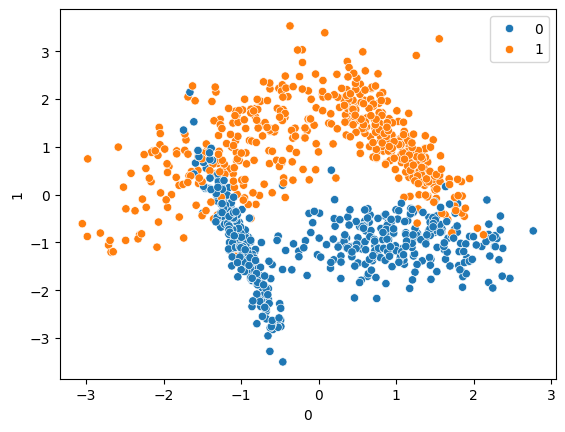

In [118]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

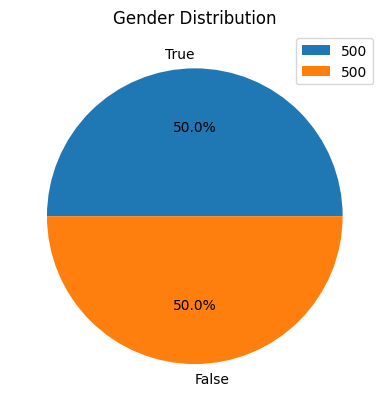

In [119]:
labels = ['True', 'False']
sizes = pd.DataFrame(y).value_counts().sort_index().values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.legend(labels)
plt.legend(sizes)
plt.show()

In [120]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [121]:
from sklearn.svm import SVC

In [122]:
# we take kernel is equal to linear

svc = SVC(kernel='linear')

In [123]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [124]:
y_pre = svc.predict(X_test)

In [125]:
y_pre

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0])

In [126]:
pd.DataFrame(y_test)[0]

0      0
1      1
2      0
3      1
4      1
      ..
245    1
246    1
247    0
248    1
249    0
Name: 0, Length: 250, dtype: int64

In [127]:
pd.DataFrame(y_pre)[0]

0      1
1      1
2      0
3      1
4      1
      ..
245    1
246    1
247    0
248    1
249    0
Name: 0, Length: 250, dtype: int64

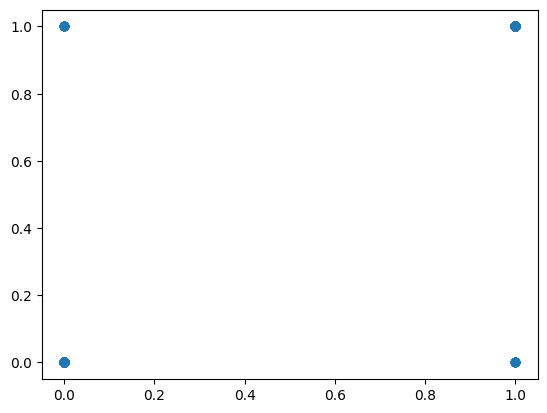

In [128]:
plt.scatter(y_test, y_pre, label="Predicted vs Actual")


<Axes: xlabel='None', ylabel='None'>

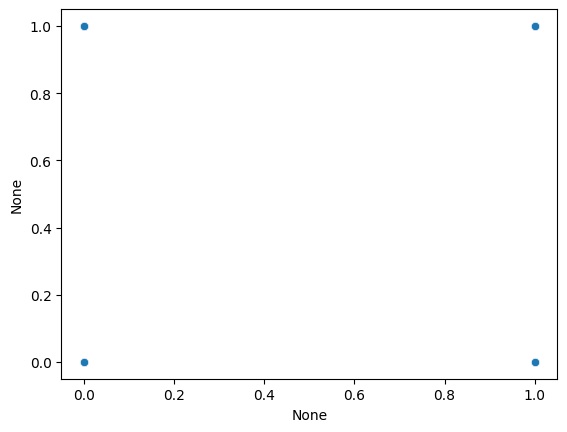

In [129]:
sns.scatterplot(
    x=pd.Series(y_test),
    y=pd.Series(y_pre)
)


In [130]:
from sklearn.metrics import classification_report,confusion_matrix

In [131]:
print("classification_report : ")
print(classification_report(y_test,y_pre))
print("confusion matrix : ")
print(confusion_matrix(y_test,y_pre))

classification_report : 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       128
           1       0.90      0.90      0.90       122

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

confusion matrix : 
[[116  12]
 [ 12 110]]


In [140]:
rbf = SVC(kernel='rbf')

In [141]:
rbf.fit(X_train,y_train)

SVC()

In [142]:
y_pred1 = rbf.predict(X_test)

In [143]:
print("classification_report : ")
print(classification_report(y_test,y_pred1))
print("confusion matrix : ")
print(confusion_matrix(y_test,y_pred1))

classification_report : 
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       128
           1       0.91      0.93      0.92       122

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

confusion matrix : 
[[117  11]
 [  8 114]]


# try to improve with polynomial kernal

In [150]:
poly = SVC(kernel='poly')
poly.fit(X_train,y_train)
y_pred2 = poly.predict(X_test)

In [151]:
print("classification_report : ")
print(classification_report(y_test,y_pred2))
print("confusion matrix : ")
print(confusion_matrix(y_test,y_pred2))

classification_report : 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       128
           1       0.89      0.89      0.89       122

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250

confusion matrix : 
[[114  14]
 [ 14 108]]


# Try to improve the score with sigmoid kernel

In [153]:
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
y_pred3 = sigmoid.predict(X_test)

In [154]:
print("classification_report : ")
print(classification_report(y_test,y_pred2))
print("confusion matrix : ")
print(confusion_matrix(y_test,y_pred2))

classification_report : 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       128
           1       0.89      0.89      0.89       122

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250

confusion matrix : 
[[114  14]
 [ 14 108]]


# Hyperparameter Tuning

In [155]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [156]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [157]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.927 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [158]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [159]:
## Prediction
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       128
           1       0.94      0.93      0.94       122

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[121   7]
 [  8 114]]
